<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/TreeDecison_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset


# Data Preparation

In [102]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 170
data0 = load_data('drive/My Drive/Dataset/InvertPhaseLong2.csv')  
ppgl0 = segment_data(data0[70:17220,0],d,0.5)  #in-phase
ppgl1 = segment_data(data0[70:,1],d,0.5)  # in-phase 
ppgl2 = segment_data(data0[70:,2],d,0.5)  # invert-phase
ppgl3 = segment_data(data0[70:,3],d,0.5)  # in-phase

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[70:,1],d,0.5)
ppg3 = segment_data(data2[70:,0],d,0.5) # Positive with noise

data3 = load_data('drive/My Drive/Dataset/sejanCun1.csv') 
ppgs0 = segment_data(data3[70:,0],d,0.5) # invert-phase
ppgs1 = segment_data(data3[70:,1],d,0.5) # noise
ppgs2 = segment_data(data3[1400:20200,2],d,0.5) # invert-phase
ppgs3 = segment_data(data3[70:,3],d,0.5) # noise

data4 = load_data('drive/My Drive/Dataset/longcunDB01.csv') 
ppgla0 = segment_data(data4[70:,0],d,0.5) # invert-phase
ppgla1 = segment_data(data4[70:,1],d,0.5) # noise
ppgla2 = segment_data(data4[70:,2],d,0.5) # invert-phase
ppgla3 = segment_data(data4[70:,3],d,0.5) # invert-phase

data5 = load_data('drive/My Drive/Dataset/InvertPhaseLong1.csv') 
ppglb0 = segment_data(data5[70:,0],d,0.5) # not good invert-phase
ppglb1 = segment_data(data5[70:,1],d,0.5) # in-phase
ppglb2 = segment_data(data5[70:,2],d,0.5) # invert-phase
ppglb3 = segment_data(data5[70:,3],d,0.5) # in-phase

data6 = load_data('drive/My Drive/Dataset/sejanCun2.csv') 
ppgsa0 = segment_data(data6[70:,0],d,0.5) # in-phase
ppgsa1 = segment_data(data6[70:,1],d,0.5) # noise
ppgsa2 = segment_data(data6[70:,2],d,0.5) # in-phase
ppgsa3 = segment_data(data6[70:,3],d,0.5) # noise

data7 = load_data('drive/My Drive/Dataset/sejanGuan2.csv') 
ppgsb0 = segment_data(data7[70:,0],d,0.5) # not good invert-phase
ppgsb1 = segment_data(data7[70:,1],d,0.5) # invert-phase
ppgsb2 = segment_data(data7[70:,2],d,0.5) # not good invert-phase
ppgsb3 = segment_data(data7[70:,3],d,0.5) # invert-phase

data8 = load_data('drive/My Drive/Dataset/dauChi01.csv') 
ppgd0 = segment_data(data8[70:,0],d,0.5) #  invert-phase
ppgd1 = segment_data(data8[70:,1],d,0.5) # NG invert-phase
ppgd2 = segment_data(data8[70:,2],d,0.5) #  invert-phase
ppgd3 = segment_data(data8[70:,3],d,0.5) # NG invert-phase

data9 = load_data('drive/My Drive/Dataset/dauGuan2.csv') 
ppgda0 = segment_data(data9[70:,0],d,0.5) #  in-phase
ppgda1 = segment_data(data9[70:,1],d,0.5) # noise -inphase
ppgda2 = segment_data(data9[70:,2],d,0.5) #  in-phase
ppgda3 = segment_data(data9[70:,3],d,0.5) # noise in-phase

data10 = load_data('drive/My Drive/Dataset/haiCun01.csv') 
ppgh0 = segment_data(data10[70:,0],d,0.5) #  in-phase
ppgh1 = segment_data(data10[70:,1],d,0.5) # noise -inphase
ppgh2 = segment_data(data10[70:,2],d,0.5) #  in-phase
ppgh3 = segment_data(data10[70:,3],d,0.5) # noise in-phase

data11 = load_data('drive/My Drive/Dataset/haiChi01.csv') 
ppgha0 = segment_data(data11[70:,0],d,0.5) #  noise
ppgha1 = segment_data(data11[70:,1],d,0.5) # noise 
ppgha2 = segment_data(data11[70:,2],d,0.5) #  noise 
ppgha3 = segment_data(data11[70:,3],d,0.5) # noise 

data12 = load_data('drive/My Drive/Dataset/longCun01.csv') 
ppglc0 = segment_data(data12[70:,0],d,0.5) # invert-phase
ppglc1 = segment_data(data12[70:,1],d,0.5) # invert-phase
ppglc2 = segment_data(data12[70:,2],d,0.5) # invert-phase
ppglc3 = segment_data(data12[70:,3],d,0.5) # invert-phase

data13 = load_data('drive/My Drive/Dataset/longGuan01.csv') 
ppgld0 = segment_data(data13[70:,0],d,0.5) # invert-phase
ppgld1 = segment_data(data13[70:,1],d,0.5) # in-phase
ppgld2 = segment_data(data13[70:,2],d,0.5) # invert-phase
ppgld3 = segment_data(data13[70:,3],d,0.5) # in-phase not good

data14 = load_data('drive/My Drive/Dataset/longChi01.csv') 
ppgle0 = segment_data(data14[70:,0],d,0.5) # NG invert-phase
ppgle1 = segment_data(data14[70:,1],d,0.5) # invert-phase
ppgle2 = segment_data(data14[70:,2],d,0.5) # NG invert-phase
ppgle3 = segment_data(data14[70:,3],d,0.5) # invẻt-phase 

data15 = load_data('drive/My Drive/Dataset/longChiA01.csv') 
ppglf0 = segment_data(data15[70:,0],d,0.5) # in-phase
ppglf1 = segment_data(data15[70:,1],d,0.5) # NG in-phase
ppglf2 = segment_data(data15[70:,2],d,0.5) # in-phase
ppglf3 = segment_data(data15[70:,3],d,0.5) # NG in-phase 

data16 = load_data('drive/My Drive/Dataset/longTest15.csv') 
ppglg0 = segment_data(data16[70:,0],d,0.5) # invert-phase
ppglg1 = segment_data(data16[70:,1],d,0.5) # invert-phase
ppglg2 = segment_data(data16[70:,2],d,0.5) # noise
ppglg3 = segment_data(data16[70:,3],d,0.5) # invert-phase 

s1 = np.concatenate((ppgl0, ppgl1, ppgl3, ppglb1,ppglb3, ppgsa0, ppgsa2, ppgda0, ppgda2, ppgld1, ppgld3, ppglf0, ppglf1, ppglf2, ppglf3)) # in-phase
#s2 = np.concatenate((ppgl2, ppgs0, ppgla0, ppgla2, ppgla3, ppglb2, ppgsb1, ppgsb3, ppgd0, ppgd2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3))  # invert-phase
s2 = np.concatenate(( ppgsb1, ppgsb3, ppgl2, ppgla2, ppgla3, ppglb2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3, ppglg0, ppglg1, ppglg3))  # invert-phase
s3 = np.concatenate((ppg2, ppgs1, ppgs3,ppgla1, ppgsa1, ppgsa3, ppgda1, ppgda3, ppgh0, ppgh1, ppgha0, ppgha1, ppgha2, ppgha3, ppglg2))           # noise Data

In [103]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [-1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((s1, s2, s3))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)

((3732,), (3397,), (3626,))
(10755, 170)


In [104]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=5)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

#X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
# X_val = X_val.reshape((X_val.shape[0],X_val.shape[1],1))
#y_train = to_categorical(y_train, num_classes= 3)
#y_test = to_categorical(y_test, num_classes= 3)
# y_val = to_categorical(y_val, num_classes= 3)

# Decision Tree Classifier

Train Data

In [105]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state=0) #'entropy/gini' 'best'
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Confuse Matrix

In [106]:
# Predicting the test set result
y_pred = model.predict(X_test)
# Making the confuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
# plot confuse matrix
print(cm)
print(classification_report(y_test,y_pred))

[[ 829  135   40]
 [ 187  779  101]
 [  51   67 1038]]
              precision    recall  f1-score   support

          -1       0.78      0.83      0.80      1004
           0       0.79      0.73      0.76      1067
           1       0.88      0.90      0.89      1156

    accuracy                           0.82      3227
   macro avg       0.82      0.82      0.82      3227
weighted avg       0.82      0.82      0.82      3227



PLOT confuse matrix

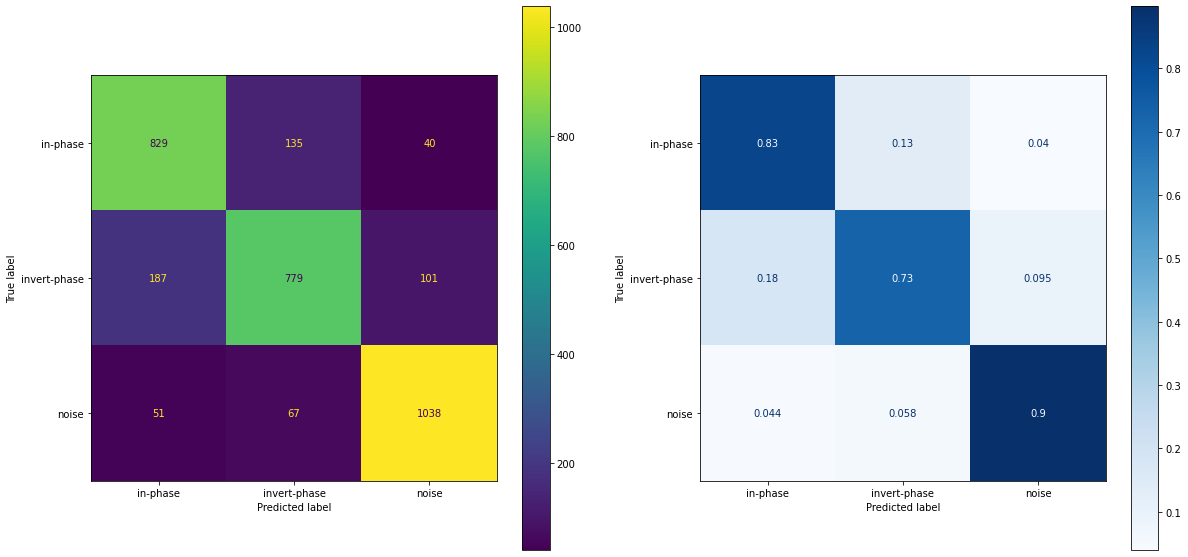

In [107]:
# plot confuse matrix
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#_, ax = plt.subplots(figsize=(10, 10))
class_names = ["in-phase", "invert-phase","noise"]
plot_confusion_matrix(model, X_test, y_test,display_labels=class_names, values_format='d' ,
                                            ax=ax1)
#_, bx = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format='.2g',ax=ax2)
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

In [108]:
model.score(X_test, y_test)

0.8199566160520607

# Random Forest Classification

In [109]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [110]:
# Predicting the test set result
y_pred = model.predict(X_test)
# Making the confuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
# plot confuse matrix
print(cm)
print(classification_report(y_test,y_pred))

[[ 924   60   20]
 [   2 1055   10]
 [   6   37 1113]]
              precision    recall  f1-score   support

          -1       0.99      0.92      0.95      1004
           0       0.92      0.99      0.95      1067
           1       0.97      0.96      0.97      1156

    accuracy                           0.96      3227
   macro avg       0.96      0.96      0.96      3227
weighted avg       0.96      0.96      0.96      3227



PLOT confuse matrix

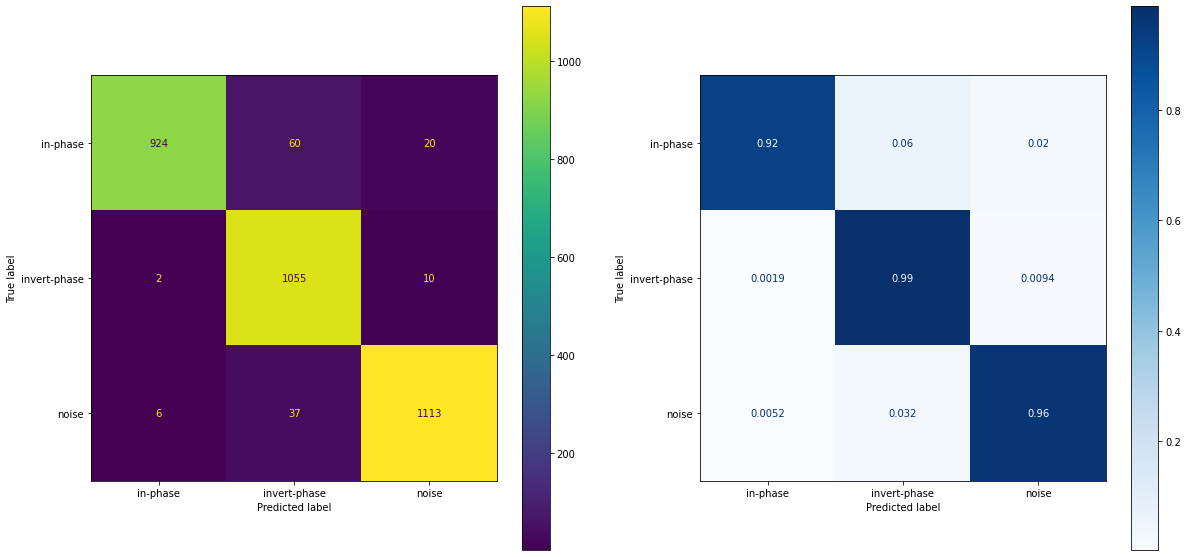

In [111]:
# plot confuse matrix
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#_, ax = plt.subplots(figsize=(10, 10))
class_names = ["in-phase", "invert-phase","noise"]
plot_confusion_matrix(model, X_test, y_test,display_labels=class_names, values_format='d' ,
                                            ax=ax1)
#_, bx = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format='.2g',ax=ax2)
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

In [112]:
model.score(X_test, y_test)

0.9581654787728541

# Evaluating the Model

Param=10.00: 97.432% (+/-0.000)
Param=30.00: 97.603% (+/-0.000)
Param=50.00: 98.116% (+/-0.000)
Param=70.00: 98.459% (+/-0.000)
Param=90.00: 98.288% (+/-0.000)
Param=100.00: 98.459% (+/-0.000)
Param=200.00: 98.630% (+/-0.000)
Param=500.00: 98.630% (+/-0.000)
Param=700.00: 98.630% (+/-0.000)
Param=1000.00: 98.459% (+/-0.000)


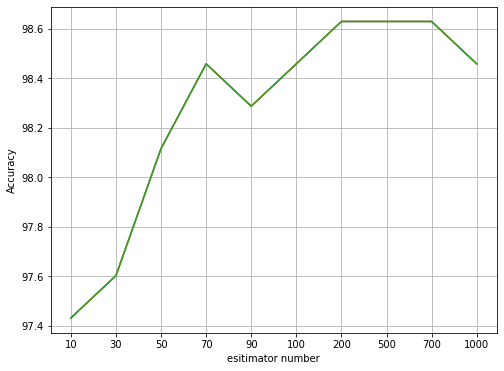

In [ ]:
from numpy import mean, std
import numpy as np

# fit and evaluate the model
def evaluate_model(trainX, trainy, testX, testy, params=100):
  model = RandomForestClassifier(n_estimators=params, criterion='entropy', random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  report = classification_report(y_test,y_pred, output_dict=True)
  accuracy = report['accuracy']
  return accuracy

# summarize scores
#def summarize_results(scores, params, kernels):
def summarize_results(models, params):
  #pyplot.figure(figsize=(6,4))
  fig, ax = plt.subplots(figsize=(8,6))
  colors = ['b','c','g','r']
  for j in range(len(models)):
    scores = models[j]
  #print(scores, params)
  # summarize mean and standard deviation
    for i in range(len(scores)):
      m, s = mean(scores[i]), std(scores[i])
      print('Param=%.2f: %.3f%% (+/-%.3f)' % (params[i], m, s))
	  # boxplot of scores
    
    #pyplot.boxplot(scores, labels=params)
    s_params = [str(x) for x in params]
    ax.plot(s_params, scores)
    #ax.plot(s_params, scores, color=colors[j])
  #ax.legend(kernels)
  ax.xaxis.set_label_text('esitimator number')
  ax.yaxis.set_label_text('Accuracy')
  ax.grid(True)
  plt.savefig('exp_svm_C_Kernels.png')

#
def run_experiment(params, repeats=3):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
  all_scores = list()
  for p in params:
  # repeat experiment
    scores = list()
    for r in range(repeats):
			#score = evaluate_model(X_train, y_train, X_test, y_test, n_Cs=p)
      score = evaluate_model(X_train, y_train, X_test, y_test, params= p)
      score = score * 100.0
			#print('>p=%d #%d: %.3f' % (p, r+1, score))
      scores.append(score)
    all_scores.append(scores)
	
  # summarize results
  #summarize_results(all_scores, params, n_kernels)
  return all_scores

def run_model( params, repeats=10):
	# test each parameter
  models = list()
  # repeat experiment
  scores = run_experiment(params = params, repeats = repeats)
	# summarize results
  models.append(scores)
  summarize_results(models, params)
  return models 
# parameter
n_params = [10, 30, 50, 70, 90, 100, 200, 500, 700, 1000]
#n_params = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10, 100, 1000, 10000]

model = run_model( params= n_params, repeats = 3)

PLOT

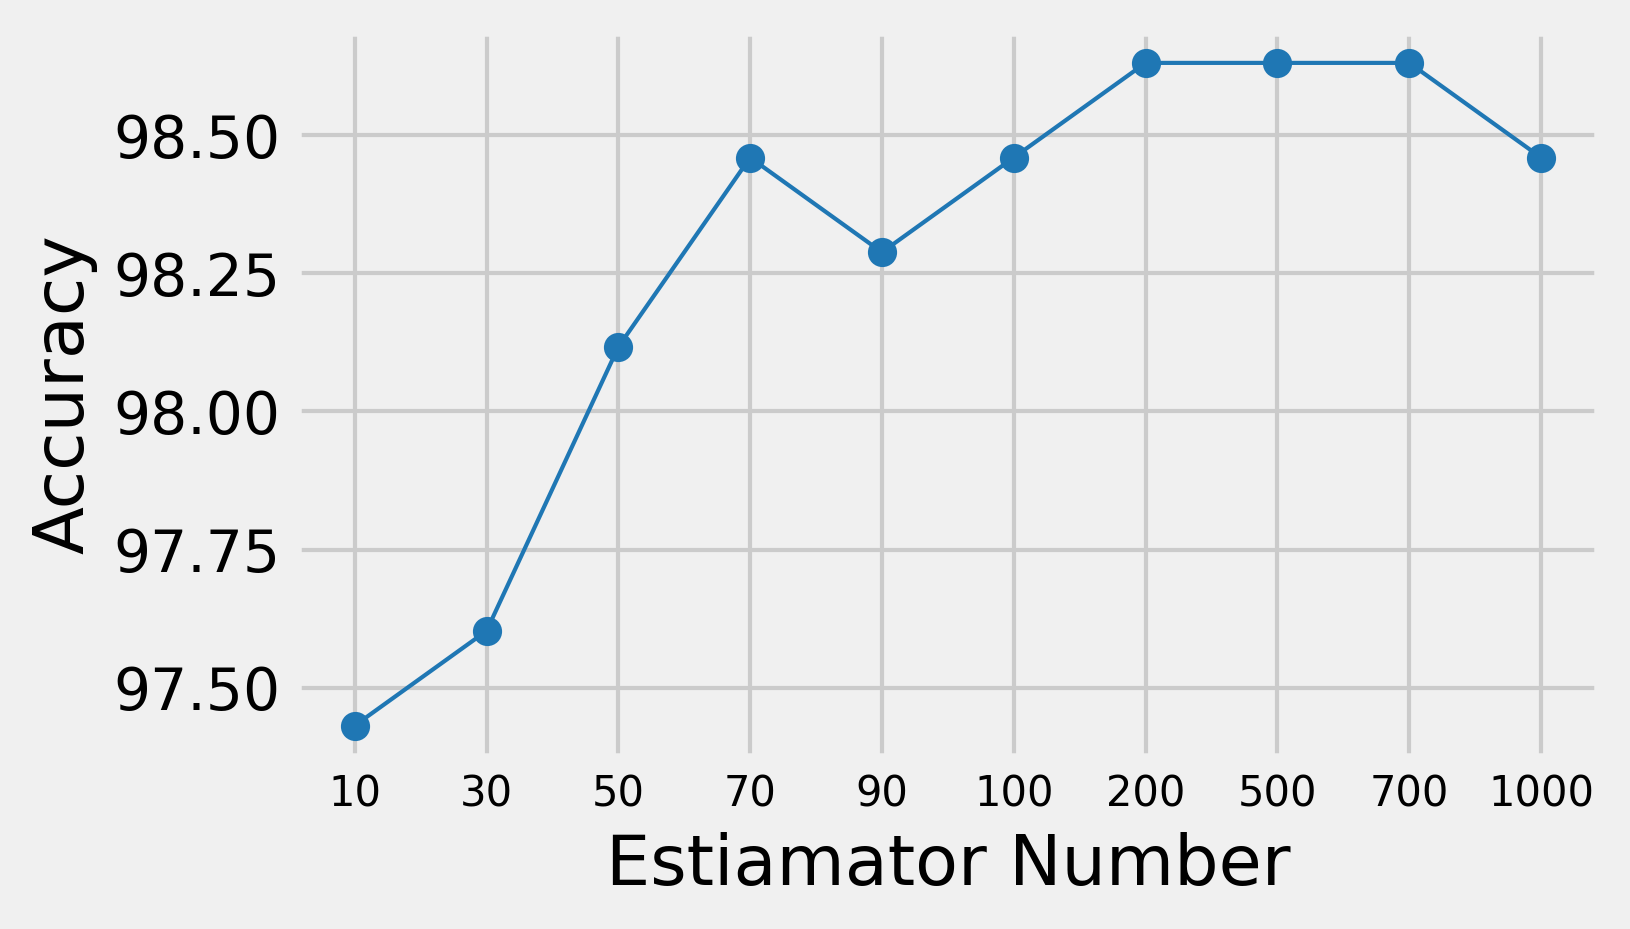

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from cycler import cycler

def summarize_results(models, params):
  #pyplot.figure()
  #_, ax = plt.subplots(figsize=(8,6))
  fig = plt.figure(figsize=(5,3),dpi=300)
  ax = fig.add_subplot(111)
  #colors = ['b','c','g','r']
  
  val = [1,5,7,8]
  styles = []
  values = range(10)
  jet = cm = plt.get_cmap('jet') 
  cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
  # style
  plt.style.use('fivethirtyeight')#'fivethirtyeight'
 
  # create a color palette
  #palette = plt.get_cmap('Set2')
  ccolors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']
  num=0
  mpl.rcParams['axes.prop_cycle'] = cycler( color=ccolors)
  for j in range(len(models)):
    scores = models[j]
    mean_scores = []#list()
    #num+=1
    colorVal = scalarMap.to_rgba(val[j])
    for i in range(len(scores)):
      m = mean(scores[i])
      mean_scores.append(m)
    s_params = [str(x) for x in params]
    #ax.plot(s_params, scores)
    
    ax.plot(s_params, mean_scores,marker='o', linewidth=1.0) #color=colors[j] color=palette(num) colorVal
  #ax.legend(kernels,loc=2, prop={'size': 6})
  
  ax.xaxis.set_label_text('Estiamator Number')
  ax.yaxis.set_label_text('Accuracy')
  
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    #tick.label.set_rotation('vertical')
  ax.grid(True)
  plt.show()
  #pyplot.savefig('exp_svm_C_Kernels.png',dpi=600)

summarize_results(models=model, params=n_params)